# 1. Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
red = pd.read_csv("winequality-red.csv",sep=';')
white = pd.read_csv("winequality-white.csv",sep=';')

## Red wine

In [3]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
red.corr()['quality'].sort_values(ascending = False, key = abs)[1:]

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


It can be seen apart from the "quality" feature that uses integers, all the other features utilize float numbers. Even though the "quality" may contain different categories, the hierachy is suggested by the integer. Hence, it's fine to keep them this way. No string type is spotted which convenient for analysis. It's worth noting that the range of float numbers is quite diversified, which entails a standardization process.

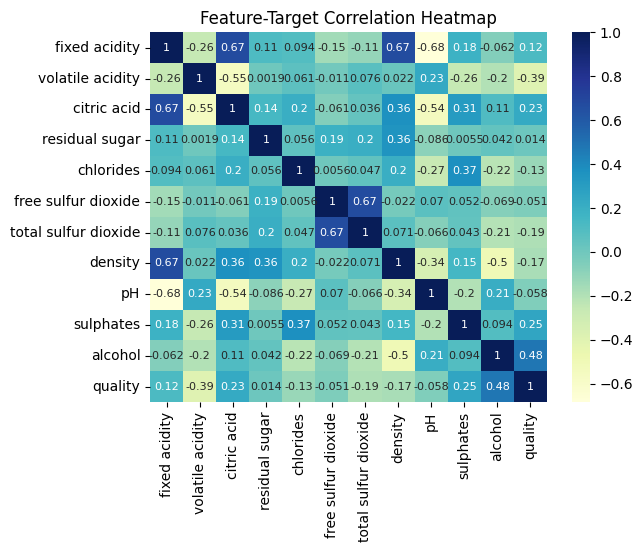

<Figure size 3000x2000 with 0 Axes>

In [6]:
sns.heatmap(red.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 8})
plt.title("Feature-Target Correlation Heatmap")
plt.figure(figsize=(30, 20))
plt.show()

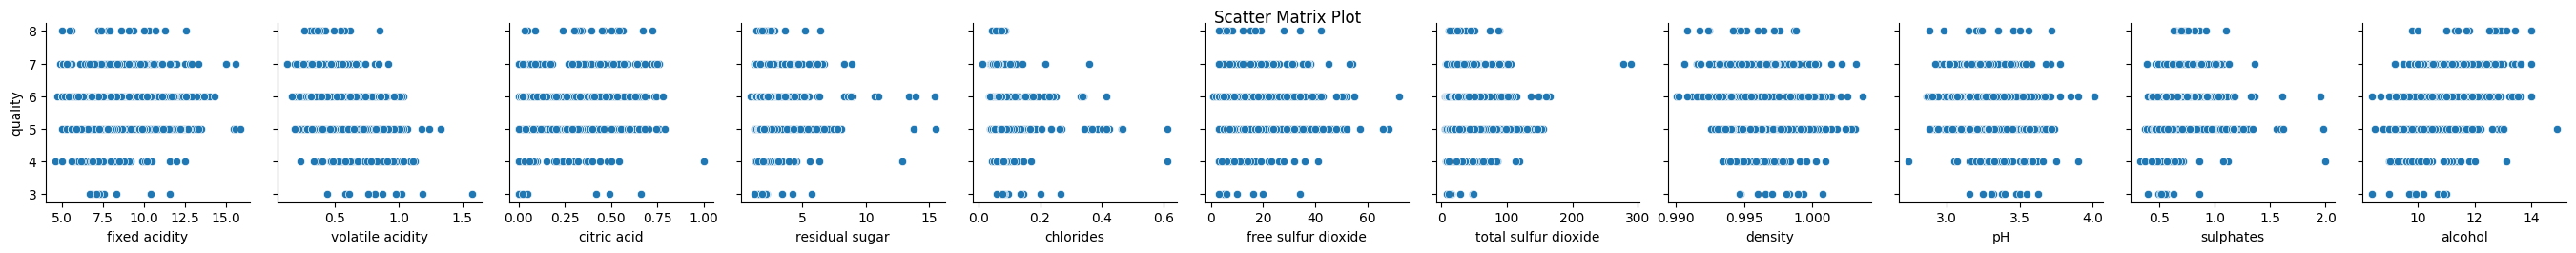

In [7]:
sns.pairplot(red, x_vars=red.columns.tolist()[:-1], y_vars=["quality"])
plt.suptitle("Scatter Matrix Plot", y=1.02)
plt.show()

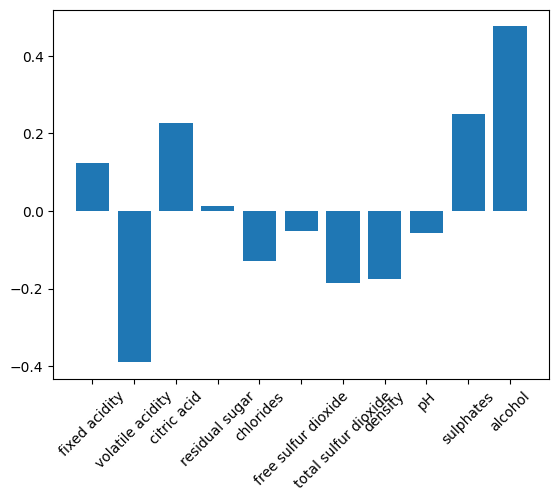

In [8]:
plt.bar(red.columns.tolist()[:-1],red.corr()['quality'][:-1])
plt.xticks(rotation=45)
plt.show()

Alcohol and volatile acidity are the 2 dominant factors, with the former having a positive correlation and the latter negative. Residual sugar, free sulfur dioxide and pH seem trivial. Nevertheless, the strongest correlation is less than half.

## White wine

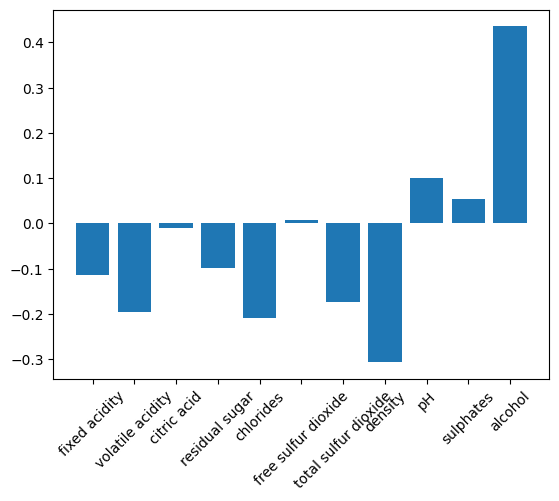

In [9]:
plt.bar(white.columns.tolist()[:-1],white.corr()['quality'][:-1])
plt.xticks(rotation=45)
plt.show()

In [10]:
white.corr()['quality'].sort_values(key = abs, ascending = False)[1:]

alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

Alcohol still takes the lion's share, being one of the few positive factors. Density, chlorides, volatile acidity and total sulfur dioxide are the main negative factors.

# 2. Closed-form OLS Solution

In [22]:
from sklearn.datasets import make_regression

In [23]:
X, y,coeffs = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42,coef=True)
beta = np.linalg.inv(X.T@X)@X.T@y
print("result from the solution: ",beta,'\n\n',
  "result from the function: ", coeffs,'\n\n',
   "difference:",beta - coeffs)

result from the solution:  [16.76546205 54.14200341  5.18335448 63.63537704 93.61744444 70.64217715
 87.08165291 10.44318875  3.16509044 70.90448128] 

 result from the function:  [16.74825823 54.12963353  5.19712837 63.64302495 93.62122462 70.64757265
 87.09691237 10.45678403  3.15861448 70.90605195] 

 difference: [ 0.01720383  0.01236988 -0.01377388 -0.00764791 -0.00378018 -0.0053955
 -0.01525946 -0.01359528  0.00647596 -0.00157066]


Potential shortcoming:

If there exist multiple features with considerable samples, the calculation could be extremely time-consuming. Moreover, it's may not be accurate enough.

# 3. Wine Quality Regression

In [13]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [74]:
def Once_upon_a_time_in_a_liqueur_store(X,y):
  X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42)

  param_grid1 = {'alpha': (np.logspace(-5, 3, 50))}
  param_grid2 = {
      'alpha': np.logspace(-5, 3, 50),
      'l1_ratio': np.logspace(-5, 0, 10)
  }
  param_grid3 = {
    'alpha': [0.1],
    'l1_ratio': np.logspace(-5, 0, 10)
  }
  param_grid4 = {
    'alpha': np.logspace(-5, 3, 50),
    'l1_ratio': [1e-4]
  }

  # Ridge - Once upon a time, there was a moutain...
  gridr = GridSearchCV(Ridge(), param_grid1, return_train_score=True, cv=10)
  gridr.fit(X_train, y_train)
  mr = mean_squared_error(gridr.predict(X_test), y_test)
  print("MSE of Ridge Regression: ", mr)
  print("best hyperparameter: ", gridr.best_params_, '\n')

  results = gridr.cv_results_
  alphas = results['param_alpha'].data
  mean_test_scores = results['mean_test_score']

  plt.figure(figsize=(10, 6))
  plt.plot(alphas, mean_test_scores, marker='o')
  plt.title('Grid Search Results on Ridge')
  plt.xlabel('Alpha')
  plt.ylabel('Mean Test Score')
  plt.xscale('log')
  plt.grid()
  plt.show()
  print('\n',50*'*','\n')

  # Lasso - And there was a cowboy...
  gridl = GridSearchCV(Lasso(), param_grid1, return_train_score=True, cv=10)
  gridl.fit(X_train, y_train)
  ml = mean_squared_error(gridl.predict(X_test), y_test)
  print("MSE of Lasso Regression: ", ml)
  print("best hyperparameter: ", gridl.best_params_, '\n')

  results = gridl.cv_results_
  alphas = results['param_alpha'].data
  mean_test_scores = results['mean_test_score']

  plt.figure(figsize=(10, 6))
  plt.plot(alphas, mean_test_scores, marker='o', color='orange',markerfacecolor='orange')
  plt.title('Grid Search Results on Lasso')
  plt.xlabel('Alpha')
  plt.ylabel('Mean Test Score')
  plt.xscale('log')
  plt.grid()
  plt.show()
  print(50*'*','\n')

  # ElasticNet - Just another lasso, but used on the mountain...
  elastic_net = ElasticNet()
  gride = GridSearchCV(estimator=elastic_net, param_grid=param_grid2, cv=5, scoring='neg_mean_squared_error')
  gride.fit(X_train, y_train)
  me = mean_squared_error(gride.predict(X_test), y_test)
  print("MSE of ElasticNet Regression: ", me)
  print("best hyperparameter: ", gride.best_params_, '\n')

  gride_l1 = GridSearchCV(estimator=elastic_net, param_grid=param_grid3, cv=5, scoring='neg_mean_squared_error')
  gride_l1.fit(X_train, y_train)
  results = gride_l1.cv_results_
  l1_ratios = results['param_l1_ratio'].data
  mean_test_scores = results['mean_test_score']

  plt.figure(figsize=(10, 6))
  plt.plot(l1_ratios, mean_test_scores, marker='o', color='green',markerfacecolor='green')
  plt.title('Grid Search Results on ElasticNet, alpha=0.1')
  plt.xlabel('l1_ratio')
  plt.ylabel('Mean Test Score')
  plt.xscale('log')
  plt.grid()
  plt.show()

  gride_al = GridSearchCV(estimator=elastic_net, param_grid=param_grid4, cv=5, scoring='neg_mean_squared_error')
  gride_al.fit(X_train, y_train)
  results = gride_al.cv_results_
  alphas = results['param_alpha'].data
  mean_test_scores = results['mean_test_score']

  plt.figure(figsize=(10, 6))
  plt.plot(alphas, mean_test_scores, marker='o', color='red',markerfacecolor='red')
  plt.title('Grid Search Results on ElasticNet, l1_ratio = 1e-4')
  plt.xlabel('alpha')
  plt.ylabel('Mean Test Score')
  plt.xscale('log')
  plt.grid()
  plt.show()

  print('\n',50*'*','\n')

  # Linear - Finally, our little innocent hero
  model = LinearRegression()
  model.fit(X_train, y_train)
  l = mean_squared_error(model.predict(X_test), y_test)
  print("MSE of Linear Regression: ", l)
  mae = mean_absolute_error(y_test, model.predict(X_test))
  print("Mean Absolute Error (MAE):", mae)
  r2 = r2_score(y_test, model.predict(X_test))
  print("R-squared (R²) coefficient of determination:", r2)

In [15]:
X_red = red.drop('quality', axis=1)
y_red = red.quality
X_white = white.drop('quality', axis=1)
y_white = white.quality
X_red_without_sugar = X_red.drop('residual sugar',axis=1)
X_white_without_C_and_F = X_white.drop(['citric acid','free sulfur dioxide'],axis=1)

MSE of Ridge Regression:  0.391710205618724
best hyperparameter:  {'alpha': 71.96856730011514} 



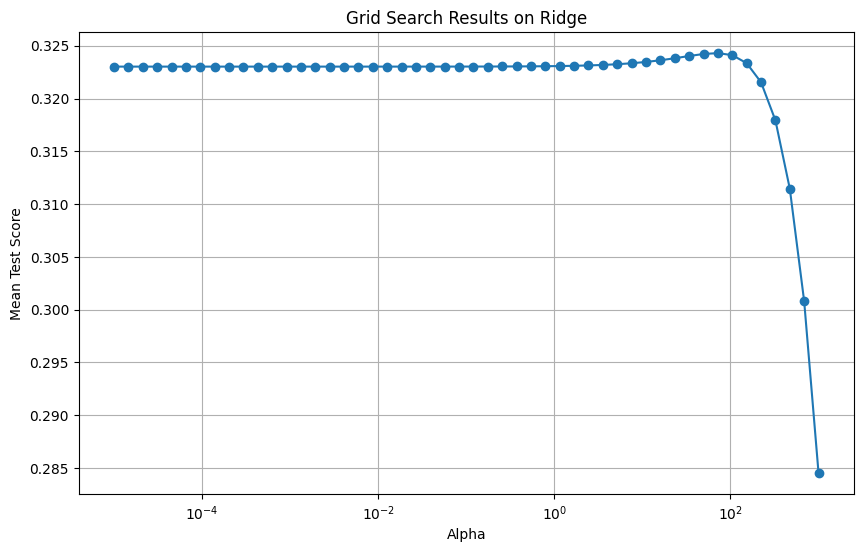


 ************************************************** 

MSE of Lasso Regression:  0.39265906002090484
best hyperparameter:  {'alpha': 0.00868511373751352} 



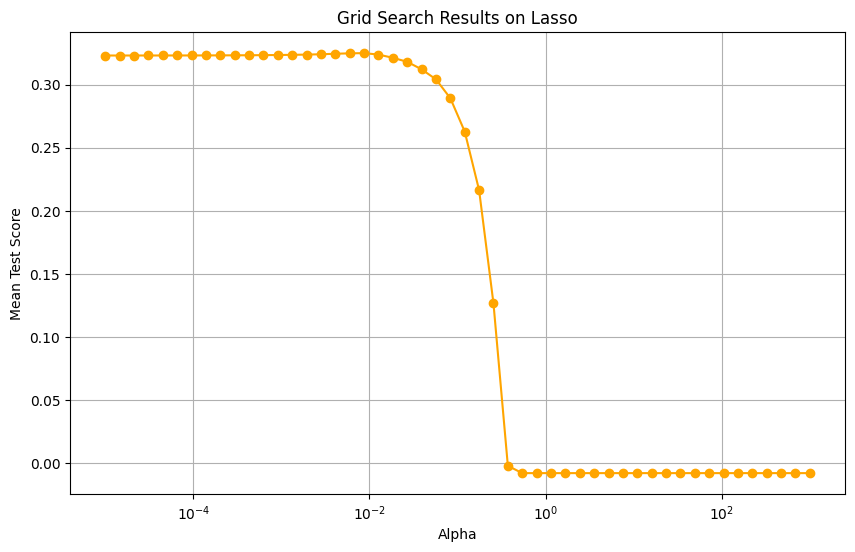

************************************************** 

MSE of ElasticNet Regression:  0.39282207312420997
best hyperparameter:  {'alpha': 0.08286427728546843, 'l1_ratio': 1e-05} 



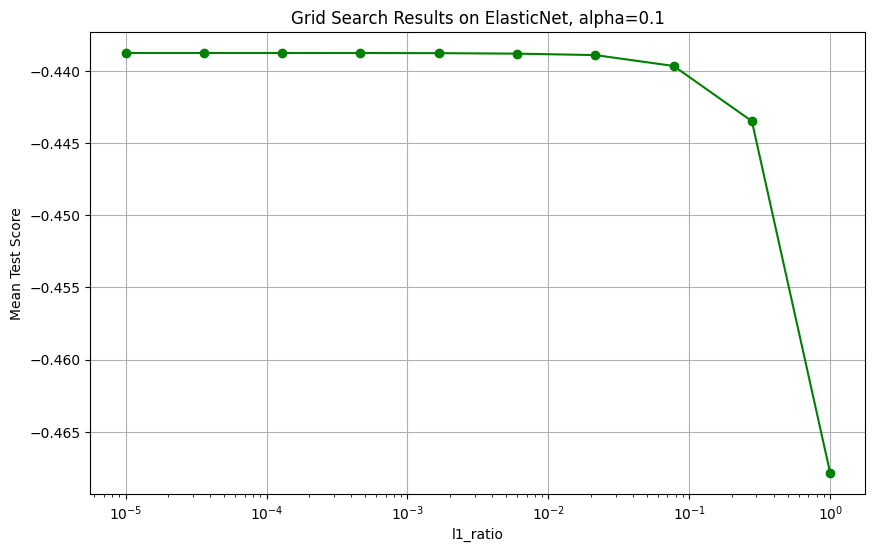

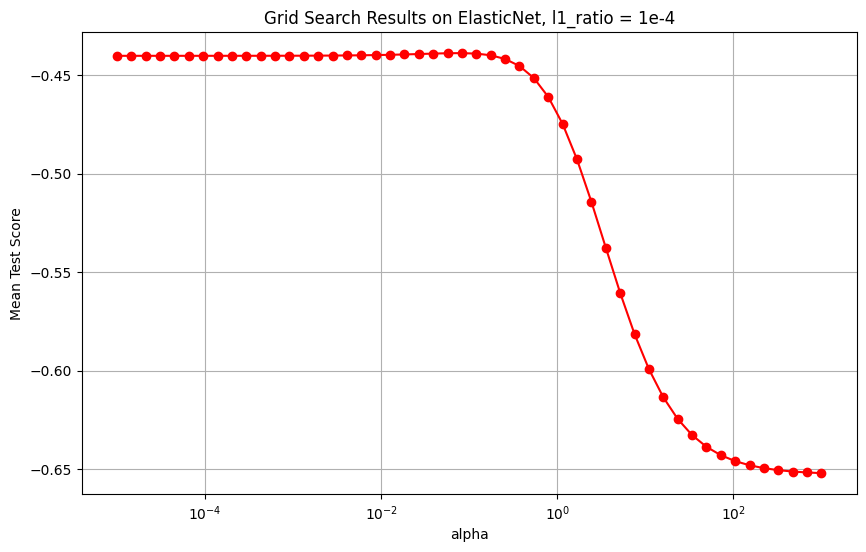


 ************************************************** 

MSE of Linear Regression:  0.39002514396395493
Mean Absolute Error (MAE): 0.5035304415524375
R-squared (R²) coefficient of determination: 0.4031803412796219


In [75]:
Once_upon_a_time_in_a_liqueur_store(X_red,y_red)

In [ ]:
Once_upon_a_time_in_a_liqueur_store(X_red_without_sugar,y_red)

MSE of Ridge Regression:  0.5710626163179109
with:  {'alpha': 33.932217718953225} 



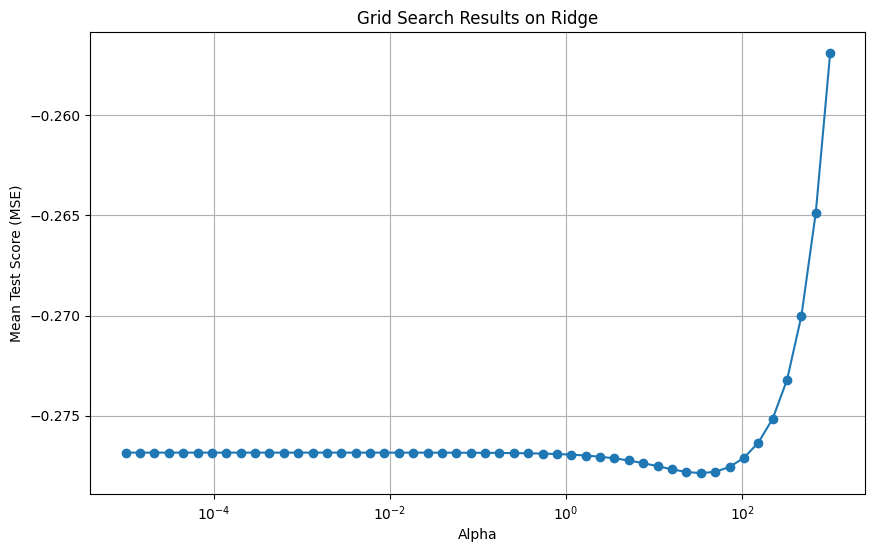


 ************************************************** 

MSE of Lasso Regression:  0.5724051052994737
with:  {'alpha': 0.004094915062380423} 



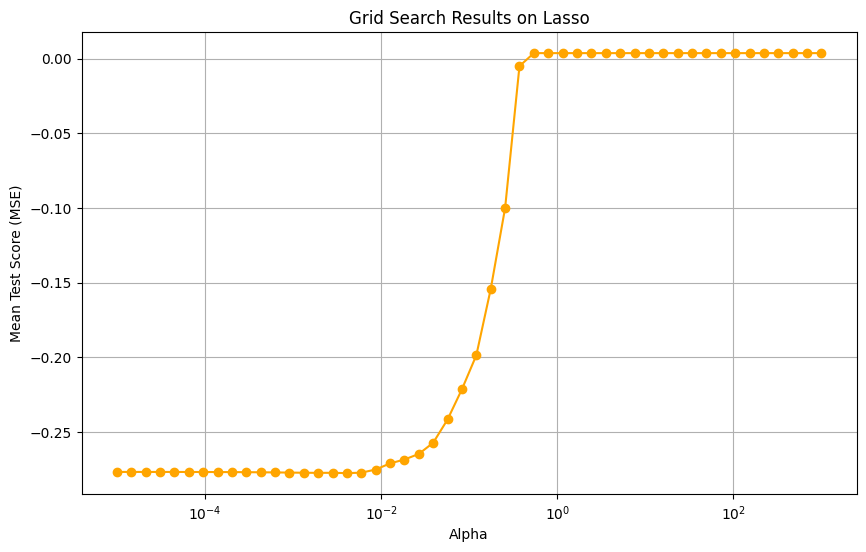

************************************************** 

MSE of ElasticNet Regression:  27275.06017367874
with:  {'alpha': 1e-05, 'l1_ratio': 1.0} 


 ************************************************** 

MSE of Linear Regression:  0.5690247717229254
Mean Absolute Error (MAE): 0.5862665383250467
R-squared (R²) coefficient of determination: 0.2652750042179155


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [18]:
Once_upon_a_time_in_a_liqueur_store(X_white,y_white)

MSE of Ridge Regression:  0.5641124331070763
with:  {'alpha': 33.932217718953225} 



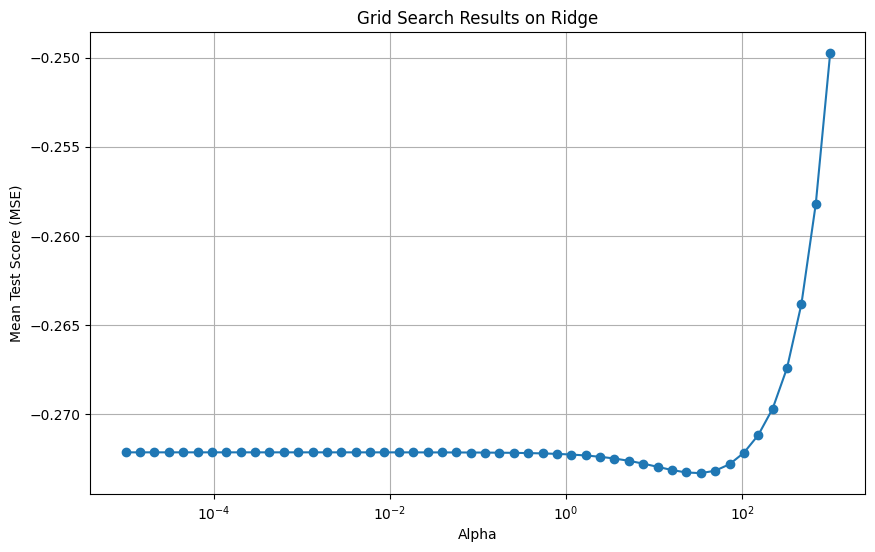


 ************************************************** 

MSE of Lasso Regression:  0.5651163254738913
with:  {'alpha': 0.004094915062380423} 



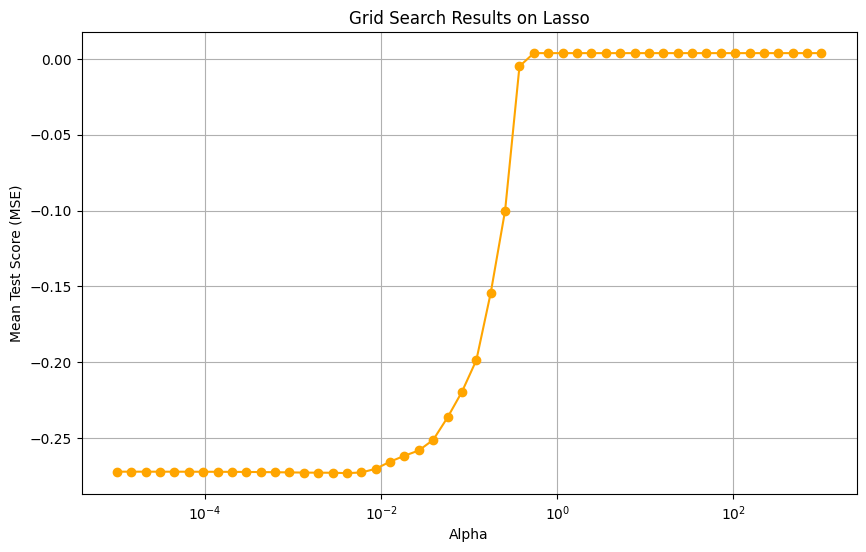

************************************************** 

MSE of ElasticNet Regression:  34004.05983615904
with:  {'alpha': 1e-05, 'l1_ratio': 1.0} 


 ************************************************** 

MSE of Linear Regression:  0.5619734349576104
Mean Absolute Error (MAE): 0.5869831872041633
R-squared (R²) coefficient of determination: 0.27437969285821406


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [19]:
Once_upon_a_time_in_a_liqueur_store(X_white_without_C_and_F,y_white)